<a href="https://colab.research.google.com/github/LeonimerMelo/Machine_Learning/blob/K-Means/K_Means_without_Centers_Information_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform K-means Clustering

**Determining K**

The major limitation of K-Means is that it requires the user to know the number of clusters associated with the data beforehand. However, determining the underlying number of clusters is challenging. One of the approaches that attempt to solve this problem relies on the *Within Cluster Sum of Squares* (WCSS) also known as **Inertia**. In the WCSS equation, $x$ denotes each data point while $C$ denotes the centroids.

$$WCSS=\sum_{x_i \, ϵ \, cluster_1} (x_i-C_1)^2 + \cdots + \sum_{x_i \, ϵ \, cluster_n} (x_i-C_n)^2$$

To use this approach, one would determine WCSS for a range of cluster numbers and plot WCSS vs cluster number. $K$ is then chosen to be the cluster number corresponding to the elbow of the plot or the cluster number after which the drop in WCSS starts to dampen.

<center><img src='https://i0.wp.com/www.blopig.com/blog/wp-content/uploads/2020/07/image-9.png?resize=251%2C202&ssl=1' width=300></center>


In [ ]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

# Get dataset
We will generate a random dataset with two features (columns) and four centers (number of class labels or clusters) using the `make_blobs` function available in the sklearn package.

We will pass the following parameters to *make_blobs* function,

* **n_samples**: number of samples or observations (rows)
* **n_features**: number of features or variables (columns)
* **centers**: number of clusters to create
* **cluster_std**: the standard deviation of the clusters. The lower the standard deviation, the closer will be data points in a given cluster
* **random_state**: Set this to any int (generally 0 or 42) to get the same output when you run it multiple times. When there is a randomization process involved, you should use random_state to create reproducible output. If you don’t use this parameter, you may get different output.

Make as panda dataframe for easy understanding

In [ ]:
dataset, classes = make_blobs(n_samples=600, n_features=2, centers=4, cluster_std=.7, random_state=0)
# Adding column to numpy array
datasetWithClasses = np.column_stack((dataset, classes))
# pandas data frame visualization
df = pd.DataFrame(datasetWithClasses, columns=['var1', 'var2', 'class'])
#df = pd.DataFrame( dataset, columns=['var1', 'var2'])
# Take a look at first ten samples
df

,var1,var2,class
0,1.667251,0.568217,1.0
1,-1.059939,8.202903,3.0
2,0.912423,-0.199774,1.0
3,2.882233,0.455331,1.0
4,-1.367087,7.741567,3.0
...,...,...,...
595,-1.824168,2.336907,2.0
596,-0.996603,7.734263,3.0
597,0.193847,1.322087,1.0
598,0.732732,4.413232,0.0


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1266: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


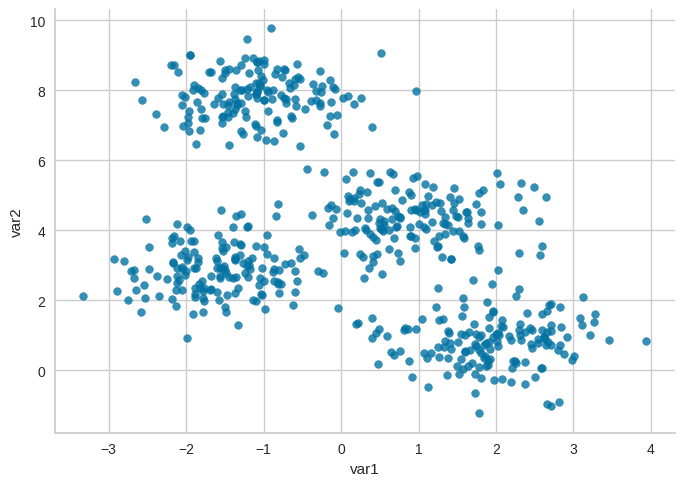

In [ ]:
# @title var1 vs var2

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='var1', y='var2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Conta a quantidade de amostra de cada classe
from collections import Counter
Counter(classes)

Counter({4: 120, 2: 120, 1: 120, 0: 120, 3: 120})

Next, the following code will help us to visualize the dataset

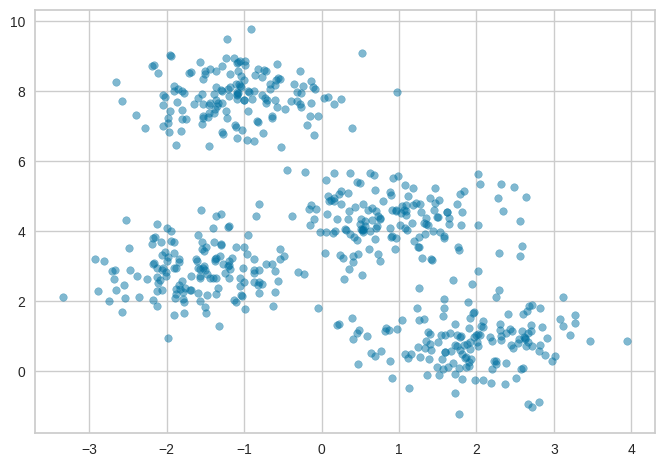

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(dataset[:, 0], dataset[:, 1], s=30, alpha=.5)
plt.show()

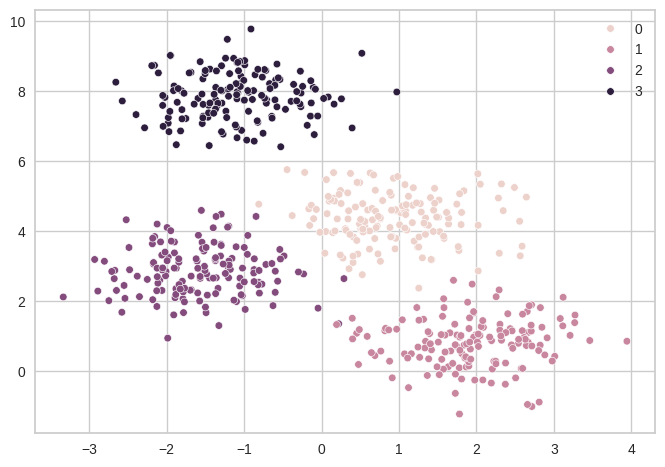

In [ ]:
# Other way to plot using Seaborn, with classes discrimination
import seaborn as sns
sns.scatterplot(x=dataset[:, 0], y=dataset[:, 1], hue=classes, s=30)
plt.show()

# Compute k-means clustering
Now, use this randomly generated dataset for k-means clustering using KMeans class and fit function available in Python sklearn package.

In k-means, it is essential to provide the numbers of the cluster to form from the data. In the dataset, we knew that there are four clusters. But, when we do not know the number of numbers of the cluster, we have to use methods such as **Elbow** or **Silhouette** methods for finding the optimal number of clusters in the dataset. Here, I will use the Elbow method to find the optimal number of clusters.

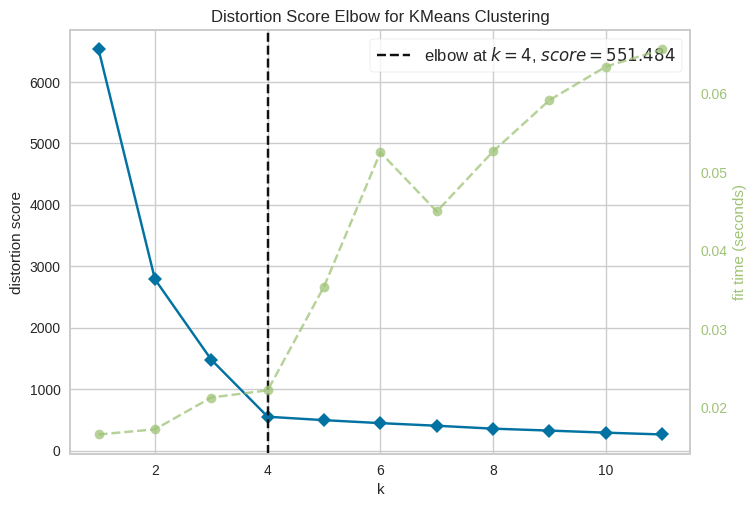

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_init=20)
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df)
visualizer.show();

In the above figure, the optimal number of clusters (k) is plotted against the distortion (total of within-cluster sum of squares for a given number of k). The optimal number of k is a point where there is a bend in the curve (elbow or knee). Based on the elbow method, the optimal number of clusters (k) is 4

In *KMeans*, `n_clusters` is the most important parameter and defines the number of clusters to form (default=8). For this example, set this value to 4 for computing the k-means clustering,

Another important parameter is `init`, which defines the method initialization to use (default=’k-means++’). k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.

In [ ]:
from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=0).fit(df)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=0)
# fit kMeans with df pandas dataset
kmeans.fit(df)

KMeans(n_clusters=4, n_init=10, random_state=0)

Once the *k-means* clustering is completed successfully, the `KMeans` class will have the following important attributes to get the return values,

* `labels_` : gives predicted class labels (cluster) for each data point
* `cluster_centers_` : Location of the centroids on each cluster. The data point in a cluster will be close to the centroid of that cluster. As we have two features and four clusters, we should get four locations.
* `inertia_` : gives within-cluster sum of squares. This is a total of the within-cluster sum of squares for all clusters.
* `n_iter_` : number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares

In [ ]:
predict_classes = kmeans.labels_  # same as kmeans.predict(df)
predict_classes[0:10]

array([1, 2, 1, 1, 2, 0, 3, 3, 3, 0], dtype=int32)

In [ ]:
kmeans.inertia_

551.4844252983787

In [ ]:
kmeans.n_iter_

3

In [ ]:
predict_centers = kmeans.cluster_centers_
predict_centers

array([[-1.57982768,  2.85033694,  2.        ],
       [ 1.93290027,  0.81305985,  1.        ],
       [-1.09989338,  7.85015011,  3.        ],
       [ 0.9161289 ,  4.36692355,  0.        ]])

Get each cluster size,

In [ ]:
Counter(kmeans.labels_)

Counter({1: 152, 2: 150, 0: 149, 3: 149})

*k-means* clustering has four clusters of size around 150 each one, depending of prevision

# Visualization of k-means clustering
Visualize the cluster as scatter plot and color the clusters using predicted class labels,

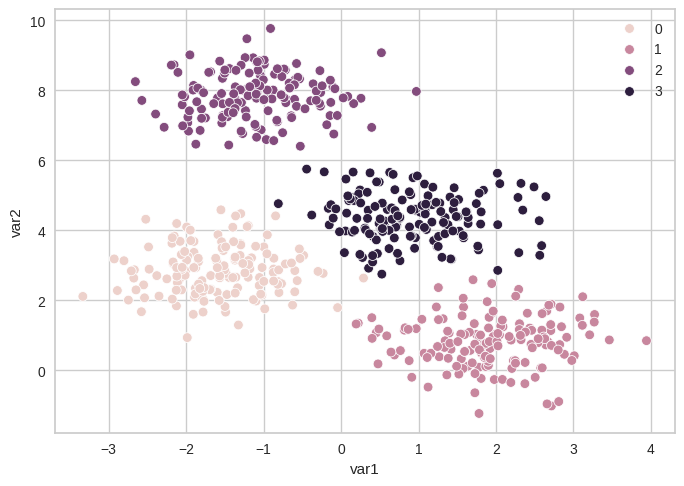

In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x="var1", y="var2", hue=predict_classes)
plt.show()

Plot k-means clustering plot with predicted centroids,

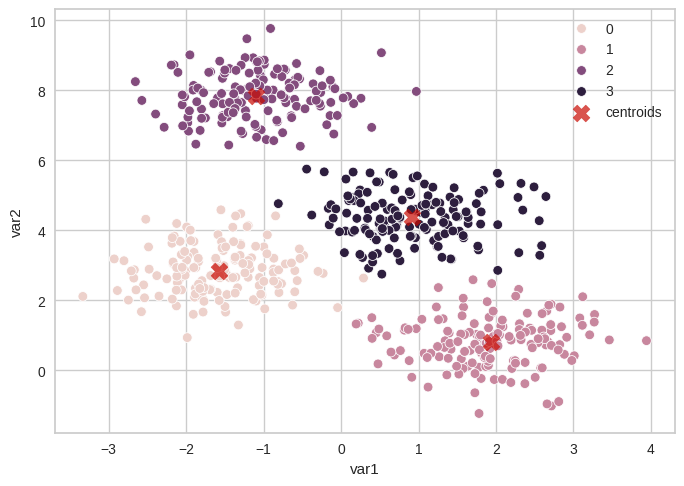

In [ ]:
sns.scatterplot(data=df, x="var1", y="var2", hue=predict_classes)
plt.scatter(predict_centers[:,0], predict_centers[:,1], marker="X", c="r", s=150, alpha=0.7, label="centroids")
plt.legend()
plt.show()

# Accuracy of k-means clustering
As k-means is a clustering method (not classification), the accuracy should not be evaluated. This is because we do not train the model with class label data and therefore there will be inconsistency in between true class labels and predicted class labels. You may compare the scatterplot of original dataset and scatterplot after k-means clustering for evaluating the performance of k-means clustering.

#Exercícios



1.   Implemente uma rotina que compara no banco de dados utilizado inicialmente neste notebook, as classes (labels) originais e as preditas e identifica os dados que tiveram predições erradas.
2.   Plotar essas predições erradas junto com o banco de dados original, de forma a visualisar os resultados.
3. Modificar o parêmetro `cluster_std` da função `make_blobs` para 0.9, 1.2 e 1.8.
4. Observar se o preditor de número de núcleos `KElbowVisualizer` consegue prever o número de núclos corretamente em todas as situações.
5. Qual o princípio de funcionamento do algoritmo K-Means?



#Referências

[1] https://domino.ai/blog/getting-started-with-k-means-clustering-in-python

[2] https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670

[3] https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

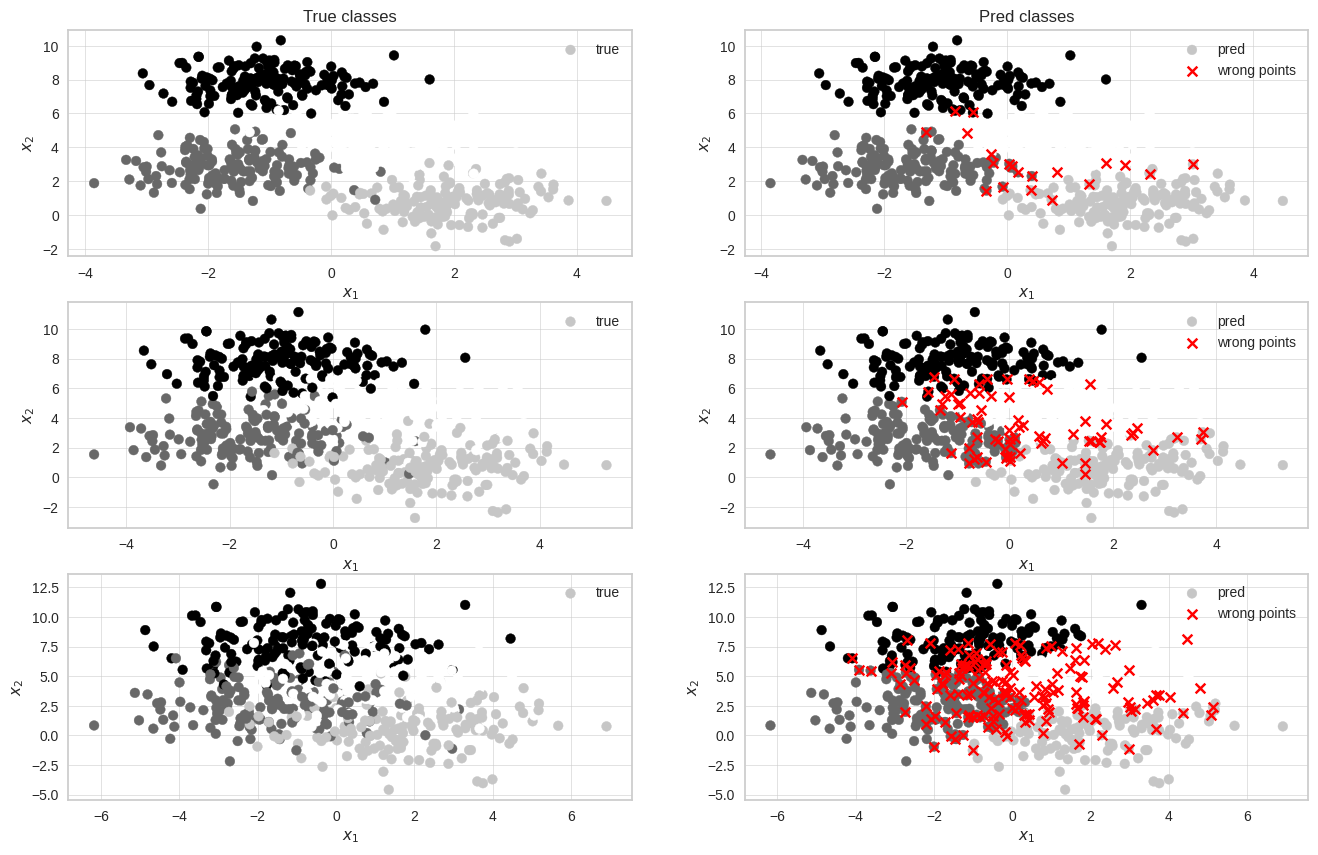

In [ ]:
# Contribuição de Isadora Martines Ferreira <isadora.martines@uel.br> 08/2024

from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np


stds = [0.9, 1.2, 1.8]
fig, axis = plt.subplots(3, 2, figsize=(16, 10))


axis[0, 0].set_title("True classes")
axis[0, 1].set_title("Pred classes")

for i, std in enumerate(stds):
    ax = axis[i]

    x_train, y_true, true_centroids = make_blobs(n_samples=600, n_features=2, centers=4, cluster_std=std, random_state=0, return_centers=True)

    kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10)

    kmeans.fit(x_train)

    # compensate for ordering
    true_index_clusters = kmeans.predict(true_centroids)
    kmeans.cluster_centers_ = kmeans.cluster_centers_[true_index_clusters]

    y_pred = kmeans.predict(x_train)

    ax[0].scatter(*(x_train.T), c=y_true, label="true")
    ax[1].scatter(*(x_train.T), c=y_pred, label="pred")

    ax[1].scatter(*x_train[y_true != y_pred].T, c="red", marker="x", label="wrong points")


for i, ax in enumerate(axis.reshape(-1)):
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.legend()
    ax.grid(lw=0.4)